In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
path = os.getcwd()
image = Image.open(path + '/Cliff_beach_BOEM_gov.jpg')
dimensions = image.size
print(dimensions)
pixels = np.array(image)
print(pixels.shape)


(2746, 1830)
(1830, 2746, 3)


Each dimension of the "dimensions" array represents the number of pixels on each side of the image, with the first dimension being the height and the second dimension being the width. The "pixels" array contains the pixel values of the image. 


ב. סכמו את התמונה על מימדי הצבע ובצעו נורמליזציה (הסרת ממוצע, חילוק בסטיית התקן). האם הנורמליזציה משנה את טיב התמונה? הציגו את התמונה ב סקלה אפורה ב אמצעות הארגומנט

cmap=’grey’ 

The mean of the image is 142.53
The standard deviation of the image is 42.49


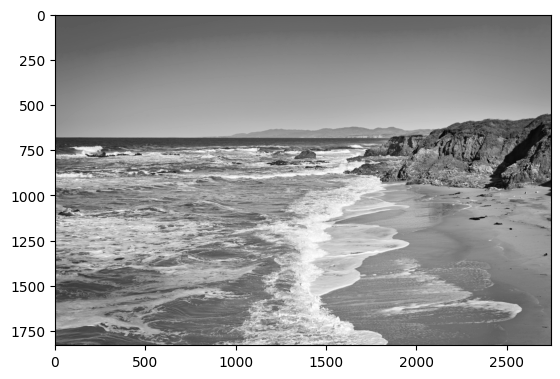

In [3]:
#convert image to greyscale
greyscale_image = image.convert('L')
mean = np.mean(greyscale_image)
std = np.std(greyscale_image)

print(f"The mean of the image is {round(mean,2)}")
print(f"The standard deviation of the image is {round(std,2)}")
normalized_image = (greyscale_image - mean) / std
arr = np.array(normalized_image)
plt.imshow(arr, cmap='gray')
plt.show()




In [5]:
U,S,V = np.linalg.svd(arr, full_matrices=False)
#print number of singular values
print(f"The number of singular values is {len(S)}")

The number of singular values is 1830


The number of singular values for an image is determined by the rank of the image matrix. The rank of a matrix represents the maximum number of linearly independent rows or columns in the matrix.


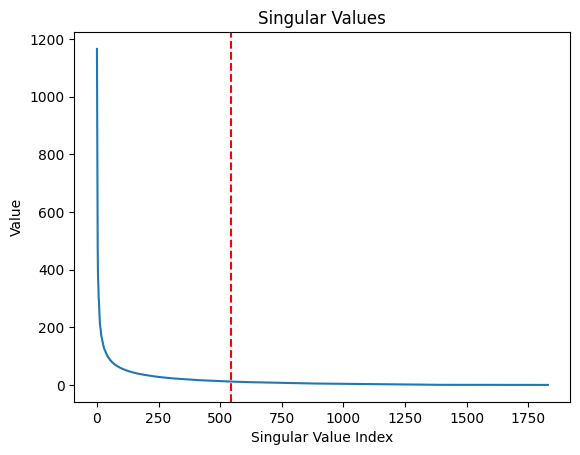

The number of singular values that are bigger than 1% of the maximum singular value is 543


In [6]:
#print a horizontal dashed over the Singular Value Index where its values after this value are smaller than 1% of the maximum singular value, and print the number of singular values that are bigger than 1% of the maximum singular value
threshold = 0.01 * S[0]
# fins the index of the first singular value that is smaller than 1% of the maximum singular value
index = np.argmax(S < threshold)
plt.plot(S)
plt.axvline(x=index, color='r', linestyle='--')
plt.xlabel('Singular Value Index')
plt.ylabel('Value')
plt.title('Singular Values')
plt.show()
#write how many singular values are bigger than 1% of the maximum singular value
print(f"The number of singular values that are bigger than 1% of the maximum singular value is {index}")


The original image size is 40201440 bytes
The normalized image size is 40201440 bytes
The effective storage size with 12 principal components is 440448 bytes
The effective storage size with 24 principal components is 883200 bytes
The effective storage size with 48 principal components is 1775616 bytes
The effective storage size with 96 principal components is 3588096 bytes
The effective storage size with 543 principal components is 22236936 bytes


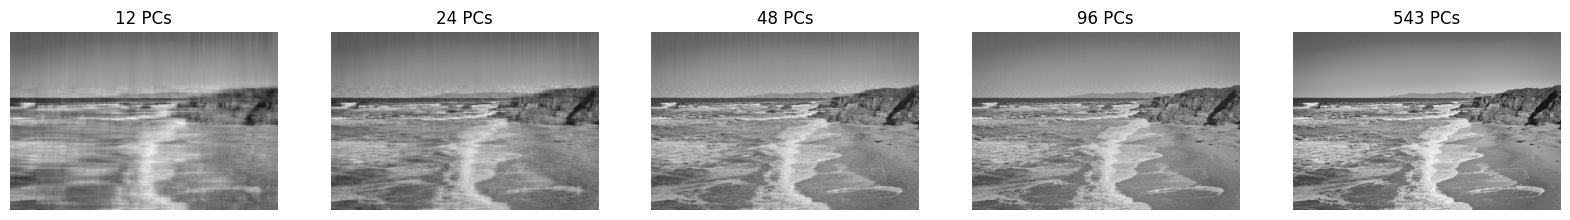

In [15]:
#save the original and normalized image size
original_size = arr.nbytes
normalized_size = normalized_image.nbytes
print(f"The original image size is {original_size} bytes")
print(f"The normalized image size is {normalized_size} bytes")


#reconstruct the image with 12, 24, 48, 96 principal components
components = [12, 24, 48, 96] +[index]
fig, ax = plt.subplots(1, len(components), figsize=(20, 20))
for i, component in enumerate(components):
    # Reconstruct image
    Uk = U[:, :component]
    Sk = np.diag(S[:component])
    VTk = V[:component, :]
    reconstructed_image = np.dot(Uk, np.dot(Sk, VTk))
    
    # Calculate the effective storage size
    effective_size = Uk.size * Uk.itemsize + Sk.size * Sk.itemsize + VTk.size * VTk.itemsize
    
    ax[i].imshow(reconstructed_image, cmap='gray')
    ax[i].set_title(f'{component} PCs')
    ax[i].axis('off')
    print(f"The effective storage size with {component} principal components is {effective_size} bytes")

plt.show()


The compression using SVD with different numbers of principal components shows a clear trade-off between storage savings and image quality. With 12 or 24 PCs, the storage size is significantly reduced to 440,448 bytes and 883,200 bytes, respectively, but the image quality is highly degraded with visible artifacts and loss of detail. At 48 PCs, the image quality improves markedly, retaining a reasonable amount of detail with fewer artifacts, while still offering substantial compression at 1,775,616 bytes. As the number of PCs increases to 96, the image quality becomes much closer to the original with most details preserved, but the storage size also increases to 3,588,096 bytes. Using 543 PCs results in an image almost indistinguishable from the original, with a storage size of 22,236,936 bytes, indicating minimal compression. Thus, the optimal number of PCs balances acceptable quality degradation with effective storage savings.

# Part 2

### Q1

In [1]:
import pandas as pd

geno = pd.read_csv('geno', header=None)
ind = pd.read_csv('ind', header=None)
snp = pd.read_csv('snp', header=None)

print(f"The number of explanatory variables is {geno.shape[1]}")
print(f"The number of observations is {geno.shape[0]}")

The number of explanatory variables is 20000
The number of observations is 777


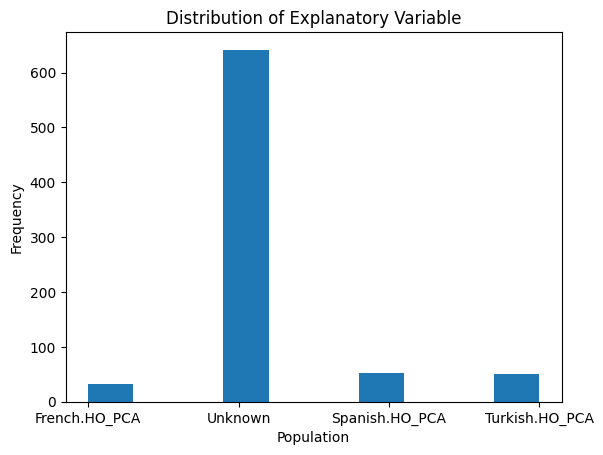

In [4]:
plt.hist(ind[2])
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Explanatory Variable')
plt.show()



### Q2

1.0

In [5]:
constant_columns = geno.columns[geno.nunique() == 1]
geno_df_cleaned = geno.drop(columns=constant_columns)

scaler = StandardScaler()
geno_df_normalized = scaler.fit_transform(geno_df_cleaned)

num_removed_columns = len(constant_columns)
num_explanatory_variables_cleaned = geno_df_cleaned.shape[1]

num_removed_columns, num_explanatory_variables_cleaned


(935, 19065)

These columns do not provide any useful information for our analysis or modeling tasks due to their variance being equal to 0. They only add redundancy and increase the computational burden during analysis.

### Q3

In [43]:
# Perform SVD
U, S, VT = np.linalg.svd(geno_df_normalized, full_matrices=False)

# Get the dimensions of the components
U.shape, S.shape, VT.shape



((777, 777), (777,), (777, 19065))

VT is the transpose of the right singular vectors matrix whose rows represent the principal components, with a dimension of 777 samples and 19065 features.
S is a diagonal matrix of singular values indicating the variance explained by each principal component, with dimensions of 777x777. U is the left singular vectors matrix representing the linear combinations of the original variables, also with dimensions of 777x777.


### Q4

In [65]:
# For the first PC, show the indexes that affect the PC the most
# Get the first PC
first_pc = VT[0,:]
# Get the indexes that affect the PC the most
indexes = np.argsort(first_pc)
# Get the top 10 indexes
top_10_indexes = indexes[-10:]


#print the related snps
related_snps = snp.iloc[top_10_indexes]
related_snps


,0,1,2,3
4050,rs9827369,3,C,T
3424,rs12328768,2,C,A
18476,rs8111566,19,G,A
13876,rs342171,12,T,C
2492,rs2610683,2,T,C
12598,rs10832165,11,G,A
2124,rs42785,2,A,G
1474,rs977146,1,A,G
13351,rs56005168,11,A,G
2548,rs906815,2,G,A


Searching the web did not yield any information regarding the importance of these SNPs. 

### Q5

In [75]:
#preform PCA
pca = PCA(n_components=2)
pca.fit(geno_df_normalized)

#project the data to the first two principal components
geno_df_projected = pca.transform(geno_df_normalized)[:, :2]
#what is the dimension of the projected data for each observation
print(geno_df_projected.shape)


(777, 2)


In [9]:
ind

,0,1,2
0,0,M,French.HO_PCA
1,1,M,French.HO_PCA
2,2,F,French.HO_PCA
3,3,F,French.HO_PCA
4,4,M,French.HO_PCA
...,...,...,...
772,772,F,Turkish.HO_PCA
773,773,F,Turkish.HO_PCA
774,774,M,Turkish.HO_PCA
775,775,M,Turkish.HO_PCA


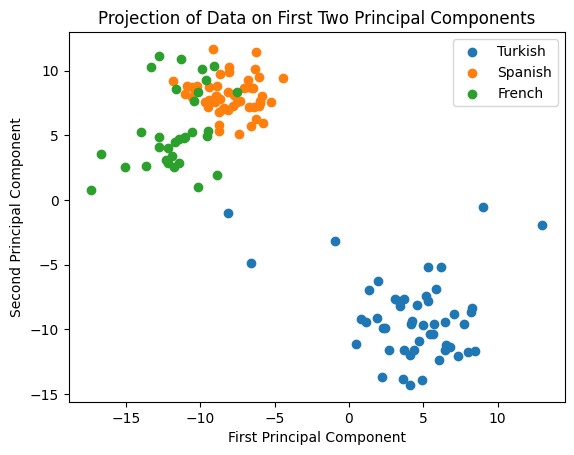

In [76]:
#use the tagging vector ("ind"). Display a 2 dimension plot of the data, projected on the obeservations from the turkish, spanish and french only. The x axis is the projection on the first principal component and the y axis is the projection on the second principal component. Use different colors for each population.
turkish = geno_df_projected[ind[2] == 'Turkish.HO_PCA']
spanish = geno_df_projected[ind[2] == 'Spanish.HO_PCA']
french = geno_df_projected[ind[2] == 'French.HO_PCA']

plt.scatter(turkish[:, 0], turkish[:, 1], label='Turkish')
plt.scatter(spanish[:, 0], spanish[:, 1], label='Spanish')
plt.scatter(french[:, 0], french[:, 1], label='French')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Data on First Two Principal Components')
plt.legend()
plt.show()



For the Turkish population, the seperation is pretty noticable. Less noticable is the seperation for the French and Spanish populations.
We can estimate that since Spain and France are closer geographicaly, the genetic differences between them are smaller than the genetic differences between them and the Turkish population.

### Q6

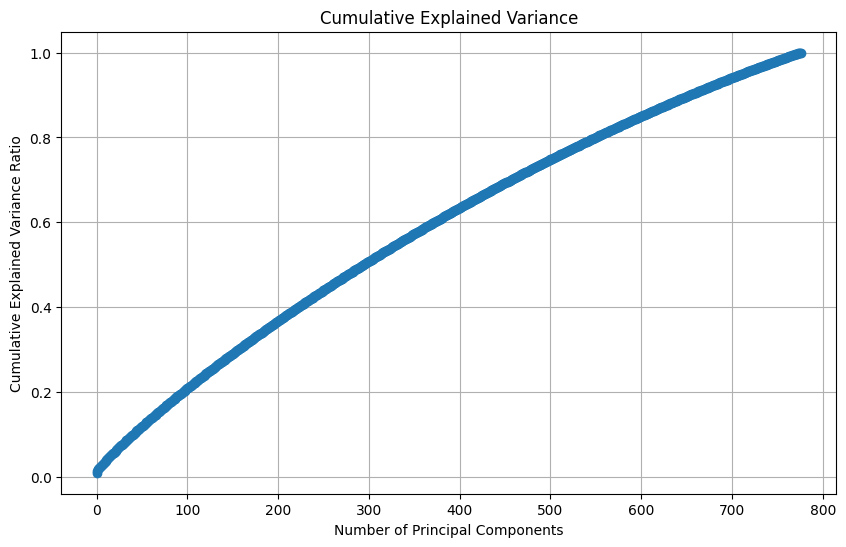

The variance explained by the first two principal components is 1.33%


In [83]:
pca = PCA()
pca.fit(geno_df_normalized)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# חשב את השונות המוסברת על ידי שני הרכיבים הראשונים
explained_variance_2_components = cumulative_explained_variance[1]
print(f'The variance explained by the first two principal components is {explained_variance_2_components:.2%}')


In [85]:
#total number of PCs in general
total_number_of_PCs = len(cumulative_explained_variance)
print(f'The total number of principal components is {total_number_of_PCs}')

The total number of principal components is 777


In [40]:
num_components_50_percent = np.argmax(cumulative_explained_variance >= 0.50) + 1
print(f'Number of components to explain at least 50% variance: {num_components_50_percent}')

pca_50_percent = PCA(n_components=num_components_50_percent)
geno_pca = pca_50_percent.fit_transform(geno_standardized)


geno_reconstructed = pca_50_percent.inverse_transform(geno_pca)


reconstruction_error = np.linalg.norm(geno_standardized - geno_reconstructed, 'fro')
print(f'Reconstruction error (Frobenius norm): {round(reconstruction_error,2)}')


Number of components to explain at least 50% variance: 296
Reconstruction error (Frobenius norm): 2766.11


### 1) Research Question:
The research question aims to understand the genetic variability and population structure among different modern populations using genetic data. We are looking to analyze the genomes of individuals from multiple populations, focusing on genetic similarities and differences among the French, Turkish, and Spanish populations. The goal is to identify principal genetic markers contributing to these variations and visualize and quantify these differences using Principal Component Analysis (PCA) and Singular Value Decomposition (SVD).

### 2) Data:
The data used in this research consists of three main components: the **geno** matrix, which contains the genetic information of 777 individuals across 20,000 SNP markers, representing the number of common alleles for each SNP; the **ind** vector, which includes the population affiliation of each individual, categorizing them as French, Spanish, Turkish, or Others; and the **snp** vector, which lists the names of the SNP markers. The **geno** matrix serves as the primary dataset for genetic analysis, the **ind** vector is used to label and categorize individuals, and the **snp** vector helps identify specific genetic markers during the analysis.

### 3) Contribution of SVD Decomposition:
SVD decomposition significantly aids in examining the research question by reducing the high-dimensional genetic data into a lower-dimensional space, preserving the most significant variability. It extracts principal components that capture maximum variance directions, highlighting the most influential genetic markers for population differences. By projecting the genetic data onto the first two principal components, we achieve a clear visualization of genetic structures and clustering based on population affiliation, revealing distinct genetic patterns. Additionally, the cumulative explained variance indicates the proportion of genetic information retained in the reduced-dimensional representation, providing insights into the genetic complexity and structure of the populations.